<a href="https://colab.research.google.com/github/Brilrs/Student-Depression-ML/blob/main/ColabT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Collect**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#EDA
import scipy as scipy
import seaborn as sns

%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True
#Desactivar la notación científica
pd.options.display.float_format = '{:.3f}'.format

#Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ls /content/drive/MyDrive



In [ ]:
!find /content/drive/MyDrive -type f -iname "student_depression_dataset.csv"

Data Collect

-Leer los datos del archivo "student_depression_dataset.csv" en un datagreame llamado "df"

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/BPAA/TF/student_depression_dataset.csv", encoding='ISO-8859-1', sep=";")

In [ ]:
df.head(5)

Data Quality & Data Cleaning

Coreccion de cabeceras o headers

In [ ]:
columnas_renombrar = { 'id':'id', 'Gender':'gender', 'Age':'age', 'City':'city', 'Profession':'profession', 'Academic Pressure':'academic_pressure',
    'Work Pressure':'work_pressure','CGPA':'cgpa','Study Satisfaction':'study_satisfaction','Job Satisfaction':'job_satisfaction',
    'Sleep Duration':'sleep_duration','Dietary Habits':'dietary_habits','Degree':'degree','Have you ever had suicidal thoughts ?':'suicidal_thoughts',
    'Work/Study Hours':'work_study_hours','Financial Stress':'financial_stress','Family History of Mental Illness':'family_history_mental_illness','Depression':'depression'
}
df.rename(columns = columnas_renombrar, inplace = True) #inplace True es confirmar los cambios

In [ ]:
df.head()

Overview Data


In [ ]:
df.shape

Data Type Mismatch

In [ ]:
df.head(3)

In [ ]:
df.dtypes

In [ ]:
df['sleep_duration'] = df['sleep_duration'].str.replace("'", "")

In [ ]:
df.head(3)

In [ ]:
df['degree'] = df['degree'].str.replace("'", "")
df['degree'] = df['degree'].str.strip()


In [ ]:
df.iloc[8:21][['id', 'degree', 'sleep_duration']]

In [ ]:
# Ver cuántos valores únicos hay por cada columna
df.nunique().sort_values(ascending=True)

Analisis de la columna job_satisfaction

In [ ]:
df['job_satisfaction'].unique()


In [ ]:
df['job_satisfaction'].value_counts()


In [ ]:
# Calcular el porcentaje que representa cada valor en la columna
df['job_satisfaction'].value_counts(normalize=True) * 100


In [ ]:
# Eliminar la columna 'job_satisfaction' por falta de variabilidad
df.drop(columns=['job_satisfaction'], inplace=True)

In [ ]:
# Verificar que se haya eliminado correctamente
df.info()


Analisis de la columna profession

In [ ]:
#Analizando los registros de profession
df['profession'].value_counts()

In [ ]:
df['profession'].value_counts(normalize=True) * 100

In [ ]:
# Eliminar la columna 'profession' por falta de variabilidad
df.drop(columns=['profession'], inplace=True)

Analisis de columna id

In [ ]:
# Eliminar la columna 'id' por falta de variabilidad
df.drop(columns=['id'], inplace=True)

Analisis de columna work pressure

In [ ]:
df['work_pressure'].value_counts(normalize=True) * 100

In [ ]:
df.drop(columns=['work_pressure'], inplace=True)

Analisis de la columna City

In [ ]:
df['city'].value_counts()

In [ ]:
df['city'].value_counts(normalize=True) * 100

In [ ]:
#1 Correcciones de nombres de ciudades
df['city'] = df['city'].replace({
    'Khaziabad': 'Ghaziabad',
    'Nalyan': 'Kalyan'
})

In [ ]:
# 2. Valores inválidos
valores_invalidos = [
    'M.Tech', 'M.Com', 'ME', '3', 'City', 'Harsha', 'Mira', 'Vaanya',
    'Gaurav', 'Reyansh', 'Kibara', 'Rashi', 'Mihir', 'Nalini', 'Nandini',
    'Saanvi', 'Bhavna', "'Less Delhi'", "'Less than 5 Kalyan'"
]

In [ ]:
df['city'] = df['city'].replace(valores_invalidos, 'Other')

In [ ]:
df['city'].value_counts()

Analsis de la columna degree

In [ ]:
df['degree'].value_counts(normalize=True) * 100

In [ ]:
#Calculo del porcentaje de cada categoria
degree_counts=df['degree'].value_counts(normalize=True) * 100

In [ ]:
# Identificar las categorías con menos del 1%
low_freq = degree_counts[degree_counts < 1].index

In [ ]:
# Agrupar esas categorías en "Others"
df['degree'] = df['degree'].replace(low_freq, 'Others')

In [ ]:
# Verificar resultado
df['degree'].value_counts(normalize=True) * 100

DUPLICADOS

In [ ]:
df.shape

In [ ]:
df.duplicated()

In [ ]:
# 1 Ver si hay filas duplicadas
df.duplicated().sum()

In [ ]:
# 2 Ver las filas duplicadas (si hay)
df[df.duplicated()]

MISSING DATA

In [ ]:
#ver la forma del dataframe
df.shape

In [ ]:
#Evaluando la cantidad de COLUMNAS en cada FILA
df.isnull()

In [ ]:
#Columnas vacias tiene cada fila (se vizualiza que en todas las filas, no hay columnas)
df.isnull().sum(axis=1).sort_values(ascending=False)

In [ ]:
df.shape

In [ ]:
df.shape[1]

In [ ]:
#Porcentaje de nulos por fila
(df.isnull().sum(axis=1)/df.shape[1]*100).sort_values(ascending=False)

COLUMNAS

In [ ]:
# Verificar nulos por columna
df.isnull().sum().sort_values(ascending=False)

OUTLIERS

In [ ]:
df.info();

Columnas Categoricas

In [ ]:
df_cat = df.select_dtypes(exclude='number').copy()
df_cat.columns

-Analisis de outliers para la variable gender

In [ ]:
ax = df['gender'].value_counts().plot(kind='bar');
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Género")

In [ ]:
df['gender'].value_counts()

In [ ]:
df['gender'].value_counts()*100/len(df)

-Analisis de outliers para la variable city


In [ ]:
df['city'].value_counts()

In [ ]:
df['city'].value_counts()*100/len(df)

In [ ]:
df['city'] = df['city'].replace('Harsh', 'Other')


In [ ]:
#Analisis de outliers para la variable city
ax = df['city'].value_counts().plot(kind='bar');
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Ciudad")

In [ ]:
df['city'].value_counts()

In [ ]:
df['city'].value_counts()*100/len(df)

Analisis de la variable sleep_duration

In [ ]:
df['sleep_duration'].value_counts()*100/len(df)

In [ ]:
df = df[df['sleep_duration'] != 'Others']

In [ ]:
df['sleep_duration'].value_counts()

In [ ]:
#Analisis de outliers para la variable sleep_duration
ax = df['sleep_duration'].value_counts().plot(kind='bar');
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Duración de sueño")

Analisis de la variable dietary_habits

In [ ]:
ax = df['dietary_habits'].value_counts().plot(kind='bar');
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Habitos dieteticos")

In [ ]:
df['dietary_habits'].value_counts()*100/len(df)

In [ ]:
df = df[df['dietary_habits'] != 'Others']

In [ ]:
df['dietary_habits'].value_counts()*100/len(df)

In [ ]:
ax = df['dietary_habits'].value_counts().plot(kind='bar');
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Habitos dieteticos")

Analisis para la columna degree

In [ ]:
df['degree'].value_counts()*100/len(df)

In [ ]:
df = df[df['degree'] != 'Others']


In [ ]:
ax = df['degree'].value_counts().plot(kind='bar');
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Grado")

Analisis para la columna suicidal_thoughts

In [ ]:
df['suicidal_thoughts'].value_counts()*100/len(df)

In [ ]:
ax = df['suicidal_thoughts'].value_counts().plot(kind='bar');
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Pensamientos suicidas")

Analisis para la columna financial_stress

In [ ]:
df['financial_stress'].value_counts()*100/len(df)

In [ ]:
df = df[df['financial_stress'] != '?']

Text(0.5, 0, 'Estres financiero')

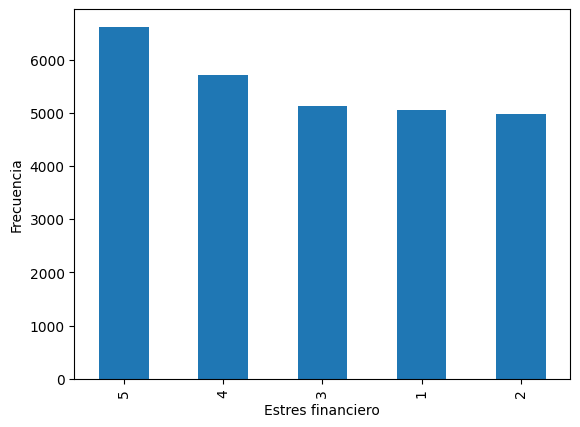

In [ ]:
ax = df['financial_stress'].value_counts().plot(kind='bar');
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Estres financiero")

Analisis para la columna family_history_mental_illness

In [ ]:
df['family_history_mental_illness'].value_counts()*100/len(df)

,count
family_history_mental_illness,
No,51.612
Yes,48.388


Text(0.5, 0, 'Antecedentes familiares de enfermedad mental')

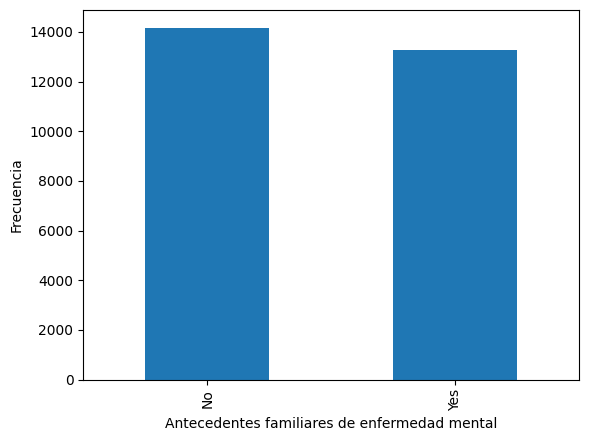

In [ ]:
ax = df['family_history_mental_illness'].value_counts().plot(kind='bar');
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Antecedentes familiares de enfermedad mental")

Analisis de las columnas numericas

In [ ]:
df_num = df.select_dtypes(include='number').copy()

In [ ]:
df_num

,age,academic_pressure,cgpa,study_satisfaction,work_study_hours,depression
0,33,5,8.970,2,3,1
1,24,2,5.900,5,3,0
2,31,3,7.030,5,9,0
3,28,3,5.590,2,4,1
4,25,4,8.130,3,1,0
...,...,...,...,...,...,...
27896,27,5,5.750,5,7,0
27897,27,2,9.400,3,0,0
27898,31,3,6.610,4,12,0
27899,18,5,6.880,2,10,1


In [ ]:
print(df_num.shape)
df_num.isna().sum().sort_values(ascending=False)

(27457, 6)


,0
age,0
academic_pressure,0
cgpa,0
study_satisfaction,0
work_study_hours,0
depression,0


In [ ]:
#Analizamos con estadísticos básicos como se comporta el promedio y la media
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
age,27457.000,25.776,4.911,18.000,21.000,25.000,30.000,59.000
academic_pressure,27457.000,3.142,1.381,0.000,2.000,3.000,4.000,5.000
cgpa,27457.000,7.659,1.471,0.000,6.290,7.770,8.920,10.000
study_satisfaction,27457.000,2.942,1.361,0.000,2.000,3.000,4.000,5.000
work_study_hours,27457.000,7.161,3.705,0.000,4.000,8.000,10.000,12.000
depression,27457.000,0.586,0.492,0.000,0.000,1.000,1.000,1.000


CGPA (Calificación promedio)

In [ ]:
# Calcular la mediana de cgpa
valor_mediana_cgpa = df_num['cgpa'].median()
print("Mediana de cgpa:", valor_mediana_cgpa)

Mediana de cgpa: 7.77


In [ ]:
# Reemplazar los valores 0 por la mediana
df_num['cgpa'] = df_num['cgpa'].replace(0, valor_mediana_cgpa)

In [ ]:
df_num.describe().T

Study Satisfaction (Satisfacción con el estudio)

In [ ]:
# Calcular la mediana de study_satisfaction
valor_mediana_satisfaction = df_num['study_satisfaction'].median()
print("Mediana de study_satisfaction:", valor_mediana_satisfaction)

In [ ]:
# Reemplazar los valores 0 por la mediana
df_num['study_satisfaction'] = df_num['study_satisfaction'].replace(0, valor_mediana_satisfaction)

In [ ]:
df_num.describe().T

Age

In [ ]:
# Eliminar outliers de edad mayores a 40
df_num = df_num[df_num['age'] <= 40]

In [ ]:
# Verificar que se eliminaron correctamente
print(df_num['age'].describe())

In [ ]:
df_num.info()

In [ ]:
df_num.describe().T

In [ ]:
df_num['cgpa'].sort_values(ascending=True).plot.bar(figsize=(15,5))

In [ ]:
df_num['cgpa'].plot.hist(bins=30, figsize=(15,5), color='skyblue', edgecolor='black')


In [ ]:
sns.boxplot(y=df_num['cgpa'], color='lightgreen')

In [ ]:
df_num['study_satisfaction'].plot.hist(bins=30, figsize=(10,5), color='lightgreen', edgecolor='black')

In [ ]:
sns.boxplot(y=df_num['cgpa'], color='skyblue')
sns.boxplot(y=df_num['study_satisfaction'], color='lightgreen')

In [ ]:
# Loop para generar histogramas y boxplots de todas las variables numéricas
for col in df_num.columns:
    # Histograma
    plt.figure(figsize=(10,4))
    plt.hist(df_num[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

    # Boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df_num[col], color='lightgreen')
    plt.title(f'Boxplot de {col}')
    plt.show()


**2.2:EDA**

Analisis Univariado

In [ ]:
#Distribución de la variable objetivo (Depresión)
sns.countplot(x='depression', data=df, palette='Set2')
plt.title('Distribución de estudiantes según nivel de depresión')
plt.xlabel('Depresión (Sí/No)')
plt.ylabel('Cantidad de estudiantes')
plt.show()

In [ ]:
#Distribución de horas de sueño
sns.countplot(x='sleep_duration', data=df, order=df['sleep_duration'].value_counts().index, palette='coolwarm')
plt.title('Distribución de duración del sueño')
plt.xlabel('Duración del sueño')
plt.ylabel('Cantidad de estudiantes')
plt.show()

In [ ]:
#Distribución de la presión academica
sns.histplot(df['academic_pressure'], kde=True, color='skyblue')
plt.title('Distribución de la presión académica')
plt.xlabel('Nivel de presión académica')
plt.ylabel('Frecuencia')
plt.show()

Variable vs Target

In [ ]:
#Relación entre la duración del sueño y la depresión
sns.countplot(x='sleep_duration', hue='depression', data=df)
plt.title('Relación entre duración del sueño y depresión')
plt.xlabel('Duración del sueño')
plt.ylabel('Cantidad de estudiantes')
plt.show()

In [ ]:

# Presion academica segun presencia de depresion
sns.boxplot(x='depression', y='academic_pressure', data=df)
plt.title('Presión académica según presencia de depresión', fontsize=14)
plt.xlabel('Depresión', fontsize=12)
plt.ylabel('Presión académica', fontsize=12)

In [ ]:
# Relación entre estrés financiera y depresión
plt.figure(figsize=(7,4))
sns.countplot(x='financial_stress', hue='depression', data=df, palette='Purples')
plt.title('Relación entre estrés financiero y depresión')
plt.xlabel('Nivel de estrés financiero')
plt.ylabel('Cantidad de estudiantes')
plt.legend(title='Depresión', labels=['No', 'Sí'])
plt.show()

Análisis Multivariado


In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de correlación entre variables numéricas')
plt.show()

EDA

In [ ]:
df.dtypes

In [ ]:
#ver la forma del dataframe
df.shape

In [ ]:
df.head(3)

**EDA Univariado**

Variables Numéricas:

*   age
*   academic_pressure
*   cgpa
*   study_satisfaction
*   work_study_hours

Variables Categóricas:

*   gender
*   city
*   sleep_duration
*   dietary_habits
*   degree
*   suicidal_thoughts
*   financial_stress
*   family_history_mental_illness
*   depression (target binaria)


In [ ]:
df_num=df.select_dtypes(include=['int64','float64'])
df_num.head(3)

In [ ]:
df_cat=df.select_dtypes(include=['object'])
df_cat.head(3)

In [ ]:
#mover depresion a categoricas
df_cat['depression']=df_num['depression']

In [ ]:
#Eliminar la variable categorica (depresion) del df numerica
df_num=df_num.drop(columns=['depression'])

In [ ]:
df_num.head(3)

In [ ]:
df_cat.head(3)

In [ ]:
print(df_cat.shape)
print(df_num.shape)

**Analisis Univariado para variable Categoricas**

Calculo de frecuencias y proporciones

In [ ]:
df_cat['depression'].value_counts()

In [ ]:
df_cat['gender'].value_counts()

In [ ]:
df_cat['gender'].value_counts(normalize=True)

In [ ]:
df_cat=df.select_dtypes(include=['object','category']).copy()
df_cat['depression']=df['depression'].astype(str)

In [ ]:
df_cat.columns

Analisis Univariado para mis variables Categóricas

In [ ]:
counts_pct={} #crea un diccionario para guardar los resultados (Conteo y Proporci)
for col in df_cat.columns: #recorrer cada columna categorica (esto permite analizar todas las variables)
  vc=df_cat[col].value_counts(dropna=False) #cuenta cuantas veces aparece cada categoria,permite contar tambien los valores faltantes
  pct=df_cat[col].value_counts(normalize=True, dropna=False)*100 #Obtiene el porcentaje,normalize=True(hace que devuelva proporciones)
  summary=pd.concat([vc,pct.round(2)],axis=1)#combinar conteo y porcentaje en una sola tabla
  summary.columns=['count','percent']
  counts_pct[col]=summary #guarda la tabla en el diccionario
  print(f"\n---{col} ---")
  display(summary)

Valores mas comunes para cada columna

In [ ]:
df_cat.mode()

Grafico de Barras

In [ ]:
#Funcion para visualizar variables categoricas
def plot_categirical_distributions(df_cat):
    """Esta funcion genera graficos de barras para cada variable categorica del dataframe
    -recorre cada columna categorica
    -calcula la frecuencia de cada categoria
    -crea graficos de barras mostrando esos valores
    -añade porcentajes en las barras
    """
    for col in df_cat.columns:
      plt.figure(figsize=(8,4))#crea una figura solo para este grafico
      ax=sns.countplot(data=df_cat,x=col)
      #etiquetar con porcentajes en las barras
      total=len(df_cat)
      for p in ax.patches:
        height=p.get_height()
        ax.text(
            p.get_x()+p.get_width()/2,
            height+0.5,
            f"{(height/total)*100:.1f}%",
            ha="center"
        )
      plt.title(f"Distribución de {col}")
      plt.xticks(rotation=45)
      plt.show()


In [ ]:
#Ejecutar la funcion
plot_categirical_distributions(df_cat)

Describiendo los hallazgos

Observación sobre variables con alta cardinalidad (City y Degree):
El análisis exploratorio de las variables categóricas reveló que algunas presentan una distribución altamente dispersa y con categorías de baja frecuencia. En particular:
City:
La categoría “other” representa únicamente el 0.1% de los registros.
El resto de categorías se distribuye entre 1.6% y 5.6%, lo cual evidencia una fuerte dispersión.
Esto sugiere que la variable podría generar un número elevado de dummies al aplicar one-hot encoding y ocasionar ruido en el modelo.
Degree:
Presenta un comportamiento similar, con múltiples categorías poco representadas.
Esta fragmentación podría afectar el rendimiento de los modelos predictivos.
Conclusión:
 Estas variables requieren un procesamiento adicional en la fase de Data Transformation, donde se evaluará la agrupación de categorías poco frecuentes o la aplicación de técnicas que reduzcan dimensionalidad antes del modelamiento.


**Análisis Univariado de Variables Numéricas**

Estadisiticos basicos (Dispersión)

In [ ]:
df_num.describe().T
#mean: media o promedio(T.Central)
#median():mediana (T.Central), o el 50%

In [ ]:
df_num_statistic=df_num.describe().T

In [ ]:
df_num_statistic

In [ ]:
#ASIMETRÍA: Te muestra hacia que lado esta "torcida la distribucion"
"""
| Valor de skew | Interpretación                                    |
| ------------- | ------------------------------------------------- |
| 0             | Distribución simétrica (como una normal perfecta)-distribución equilibrada. |
| > 0           | Asimetría positiva → cola hacia la derecha     skew negativo.  |
| < 0           | Asimetría ne  positivo.   |

"""
df_num.skew()

In [ ]:
#CURTOSIS:mide qué tan "picuda" o "aplanada" es la distribucion, y cuantos outliers es problable que existan
"""
| Valor de kurt | Interpretación                              |
| ------------- | ------------------------------------------- |
| 0             | Igual a una distribución normal             -Mesocúrtica (kurt ≈ 0)|
| > 0           | Leptocúrtica → más picuda, más outliers    -Leptocúrtica (kurt > 0) |
| < 0            | Platicúrtica → más achatada, menos outliers -Platicúrtica (kurt < 0)|
"""
df_num.kurt()

***Agregando el rango para identificar dispersion (RANGO):***
Te dice qué tan extendida está cada variable.
Sirve para detectar si una variable tiene valores exageradamente alejados.

***Detectar concentración de los datos (IQR):***
IQR = 75% – 25%
El IQR mide la dispersión del 50% central de los datos.
Es mucho más robusto que el rango y no es afectado por outliers.

***Calcular límites para detectar outliers***
min_outlier = Q1 – 1.5 × IQR
max_outlier = Q3 + 1.5 × IQR
Estos dos valores se usan porque:

Son los límites estándar del boxplot.
Permiten detectar posibles outliers univariados.
Nos ayudan a decidir si una variable requiere tratamiento posterior, como:

Winsorización

*   Capado de valores extremos
*   Transformaciones log/sqrt
*   Escalamiento robusto
*   Modelos insensibles a outliers


In [ ]:
df_num_statistic['rango']=df_num_statistic.loc[:,'max']-df_num_statistic.loc[:,'min']
df_num_statistic['rango_IQR']=df_num_statistic.loc[:,'75%']-df_num_statistic.loc[:,'25%']
df_num_statistic['min_outlier'] = df_num_statistic['25%'] - 1.5*(df_num_statistic['75%'] - df_num_statistic['25%'])
df_num_statistic['max_outlier'] = df_num_statistic['75%'] + 1.5*(df_num_statistic['75%'] - df_num_statistic['25%'])
df_num_statistic


BoxPlot (DISPERSION)

In [ ]:
import matplotlib.pyplot as plt

# Lista de variables numéricas
numeric_cols = ['age', 'academic_pressure', 'cgpa', 'study_satisfaction', 'work_study_hours']

# Generar boxplots
for col in numeric_cols:
    plt.figure(figsize=(15,6))
    df_num[col].plot.box(vert=False)   # igual que tu profesor (horizontal)
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.grid(axis='x', alpha=0.3)
    plt.show()


Histogramas (FORMAS)

In [ ]:
# Lista de variables numéricas (puedes ajustarla si cambia)
numeric_cols = ['age', 'academic_pressure', 'cgpa', 'study_satisfaction', 'work_study_hours']

# Generar histogramas
for col in numeric_cols:
    plt.figure(figsize=(15,6))
    df_num[col].plot.hist(bins=30)   # puedes cambiar bins si quieres más detalle
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', alpha=0.3)
    plt.show()


**Funcion de probabilidad de masa (pmf)**

In [ ]:
#contar los diferentes tipos de la variable presion academica y sastifacion de estudio
ap=df_num['academic_pressure'].value_counts().sort_index()
ss=df_num['study_satisfaction'].value_counts().sort_index()

tabla=pd.DataFrame({
    'academic_pressure':ap,
    'study_satisfaction':ss
})
print(tabla)


In [ ]:
#contar todos los tipos de la variable presion academica
tablan = pd.DataFrame({
    'academic_pressure': [len(df_num['academic_pressure'])],
    'study_satisfaction': [len(df_num['study_satisfaction'])]
})

print(tablan)

In [ ]:
df_pmf_ap=df_num['academic_pressure'].value_counts().sort_index()/len(df_num['academic_pressure'])
df_pmf_ss=df_num['study_satisfaction'].value_counts().sort_index()/len(df_num['study_satisfaction'])
probabilidad=pd.DataFrame({
    'academic_pressure':df_pmf_ap,
    'study_satisfaction':df_pmf_ss
})
print(probabilidad)

In [ ]:
#Histograma por variable (valores y frecuencia)
numeric_cols = ['academic_pressure', 'study_satisfaction']
for col in numeric_cols:
    plt.figure(figsize=(15,6))
    df_num[col].plot.hist(bins=30)
    plt.title(f'Histograma de la variable {col}')
    plt.xlabel(f'Valores de {col}')     # EJE X
    plt.ylabel('Frecuencia')            # EJE Y
    plt.grid(axis='y', alpha=0.3)
    plt.show()

In [ ]:
probabilidad['study_satisfaction'].plot(kind='bar', figsize=(10,4))
plt.title("PMF de Study Satisfaction")
plt.xlabel("Niveles")
plt.ylabel("Probabilidad")
plt.grid(axis='y', alpha=0.3)
plt.show()


In [ ]:
#Histograma por variable (niveles y probabilidad)
probabilidad.plot(kind='bar', figsize=(12,5))
plt.title("Probabilidad de Masa (PMF) de Academic Pressure y Study Satisfaction")
plt.xlabel("Niveles de la variable")
plt.ylabel("Probabilidad")
plt.grid(axis='y', alpha=0.3)
plt.show()

Funcion de distribucion acumuada (cdf)

In [ ]:
pmf=df_num['cgpa'].value_counts().sort_index()/len(df_num['cgpa'])
pmf

In [ ]:
#plotee con cumsum() su calculo anterior
pmf.cumsum()

In [ ]:
pmf.cumsum().plot()
plt.locator_params(axis='x', nbins=20)
plt.title('Probabilidad acumulada de periodo de cgpa')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Lista de variables continuas
vars_continuas = ['cgpa', 'age', 'work_study_hours']

for var in vars_continuas:
    data_sorted = df_num[var].sort_values()
    cdf = np.arange(len(data_sorted)) / (len(data_sorted) - 1)

    plt.figure(figsize=(12,6))
    plt.plot(data_sorted, cdf)
    plt.title(f'Función de Distribución Acumulada (CDF) - {var}')
    plt.xlabel(var)
    plt.ylabel('Probabilidad acumulada')
    plt.grid(True)
    plt.show()


Análisis de la funcion de densidad

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.kdeplot(df_num['cgpa'], fill=True)
plt.title('Densidad de probabilidad de CGPA')
plt.xlabel('cgpa')
plt.ylabel('densidad')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

variables = ['cgpa', 'age', 'work_study_hours']

for var in variables:

    # KDE con línea verde
    df_num[var].plot.kde(color='green', bw_method=1)

    # Calculamos min, max, mean, std
    vmin = df_num_statistic.loc[var, 'min']
    vmax = df_num_statistic.loc[var, 'max']
    mean = df_num_statistic.loc[var, 'mean']
    std = df_num_statistic.loc[var, 'std']

    # Rango de valores
    xs = np.linspace(vmin, vmax, 200)

    # Curva normal teórica
    ys = scipy.stats.norm(mean, std).pdf(xs)

    # Agregamos la curva normal en rojo
    plt.plot(xs, ys, color='red', linestyle='dashed')

    plt.title(f'Gráfico de densidad de {var}')
    plt.xlabel(var)
    plt.ylabel('Densidad')
    plt.show()


Análisis Bivariado

In [ ]:
df.head(3)

La variable target ya esta en valores 0 o 1

In [ ]:
df_cat_num=pd.concat([df_cat,df_num],axis=1)
df_cat_num.head(3)

Numérico vs Numérico

Scatter

cgpa vs study_satisfaction

In [ ]:
f, ax = plt.subplots( figsize = (15,6))
ax.scatter( data=df_num, x = 'study_satisfaction', y = 'cgpa', alpha=0.5, s=30);
ax.set_title('Gráfico del promedio acumulado de sastifacion de estudio vs cgpa')
ax.set_xlabel('study_satisfaction')
ax.set_ylabel('cgpa');

In [ ]:
f, ax = plt.subplots( figsize = (15,6))
ax.scatter( data=df_num, x = 'work_study_hours', y = 'cgpa', alpha=0.5, s=30);
ax.set_title('Gráfico del promedio acumulado de horas de estudio vs cgpa')
ax.set_xlabel('work_study_hours')
ax.set_ylabel('cgpa');

In [ ]:
f, ax = plt.subplots( figsize = (15,6))
ax.scatter( data=df_num, x = 'academic_pressure', y = 'cgpa', alpha=0.5, s=30);
ax.set_title('Gráfico del promedio acumulado de Calificaciones vs la presion academica')
ax.set_xlabel('academic_pressures')
ax.set_ylabel('cgpa');

In [ ]:
f, ax = plt.subplots( figsize = (15,6))
ax.scatter( data=df_num, x = 'work_study_hours', y = 'age', alpha=0.5, s=30);
ax.set_title('Gráfico del promedio acumulado de Calificaciones vs la presion academica')
ax.set_xlabel('work_study_hours')
ax.set_ylabel('age');

In [ ]:
f, ax = plt.subplots( figsize = (15,6))
ax.scatter( data=df_num, x = 'age', y = 'cgpa', alpha=0.5, s=30);
ax.set_title('Gráfico del promedio acumulado de age vs la cgpa')
ax.set_xlabel('age')
ax.set_ylabel('cgpa');

Histograma 2D

academic_pressure vs cgpa

In [ ]:
f, ax = plt.subplots( figsize = (15,6))
ax.hist2d ( data=df_num, x = 'cgpa', y = 'academic_pressure', alpha=0.8);
ax.set_title('Gráfico de histograma 2D')
ax.set_xlabel('cgpa')
ax.set_ylabel('academic_pressure');

work_study_hours vs academic_pressure

In [ ]:
f, ax = plt.subplots( figsize = (15,6))
ax.hist2d ( data=df_num, x = 'work_study_hours', y = 'academic_pressure', alpha=0.8);
ax.set_title('Gráfico de histograma 2D')
ax.set_xlabel('work_study_hours')
ax.set_ylabel('academic_pressure');

cgpa vs age

In [ ]:
f, ax = plt.subplots( figsize = (15,6))
ax.hist2d ( data=df_num, x = 'cgpa', y = 'age', alpha=0.8);
ax.set_title('Gráfico de histograma 2D')
ax.set_xlabel('cgpa')
ax.set_ylabel('age');

Scatter y distribucion

In [ ]:
#gráfico seaborn
sns.displot(
    data = df_num,
    x = 'academic_pressure',
    y = 'cgpa',
    rug = True #pintado de los ejes
);

In [ ]:
#gráfico seaborn
sns.displot(
    data = df_num,
    x = 'work_study_hours',
    y = 'academic_pressure',
    rug = True #pintado de los ejes
);

In [ ]:
#gráfico seaborn
sns.displot(
    data = df_num,
    x = 'cgpa',
    y = 'study_satisfaction',
    rug = True #pintado de los ejes
);

In [ ]:
sns.displot(
    data = df_num,
    x = 'cgpa',
    y = 'study_satisfaction',
    rug = True,
    kind = 'kde' #kind=Kde crea un gráfico de densidad
);

Variable categorica vs numericas

In [ ]:
df_cat_num=pd.concat([df_cat,df_num],axis=1)
df_cat_num.head(3)


***Data Trasformacion***

In [ ]:
df_cat.head(5)

Bloque de transformacion de variables categoricas

a) Identificar categorias poco frecuentes

In [ ]:
freq_city = df_cat['city'].value_counts(normalize=True)
freq_degree = df_cat['degree'].value_counts(normalize=True)

print(freq_city)
print(freq_degree)


Agrupar categorías poco frecuentes

In [ ]:
threshold = 0.01  # 1%

rare_cities = freq_city[freq_city < threshold].index
rare_degrees = freq_degree[freq_degree < threshold].index

df_cat['city'] = df_cat['city'].replace(rare_cities, 'Other')
df_cat['degree'] = df_cat['degree'].replace(rare_degrees, 'Other')


Aplicar un método de codificación apropiado

Como ahora tus variables tienen todavía bastantes categorías (aunque menos), NO conviene OneHot.

Puedes usar:

A. Frequency Encoding (más sencillo)


B. Target Encoding (si tienes target)

Usando Frecuency Encoding

In [ ]:
df_cat['city_freq'] = df_cat['city'].map(df_cat['city'].value_counts(normalize=True))
df_cat['degree_freq'] = df_cat['degree'].map(df_cat['degree'].value_counts(normalize=True))


Usando Target Encoding

In [ ]:
!pip install category_encoders


Resultados

In [ ]:
from category_encoders import TargetEncoder
# Variables categóricas que vas a transformar
categorical_vars = ['city', 'degree']

# Target
y = df['depression']   # target binario 0/1

# Subconjunto categórico
X_cat = df[categorical_vars]

# Inicializar el codificador
te = TargetEncoder(cols=categorical_vars)

# Ajustar y transformar
df_cat_te = te.fit_transform(X_cat, y)

df_cat_te.head()



borrando las variables originales

In [ ]:
df_cat_encoded = df_cat.drop(['city','degree'], axis=1)


In [ ]:
df_cat.head(10)

**Tratamiento de outliers en variables numéricas**

***Winsorización superior (age)***
Esto elimina valores ridículamente altos sin borrar registros.

In [ ]:
from scipy.stats.mstats import winsorize

# Copia de variables numéricas
df_num_tr = df_num.copy()

# Winsorización: cortar solo el 1% superior
df_num_tr['age_winsor'] = winsorize(df_num['age'], limits=(0, 0.01))


In [ ]:
df_num_tr.head(3)

***Winsorización inferior (cgpa)***


Corta el 1% inferior (valores casi cero o negativos si existieran).

In [ ]:
df_num_tr['cgpa_winsor'] = winsorize(df_num['cgpa'], limits=(0.01, 0))


In [ ]:
df_num_tr.head(3)

In [ ]:
from scipy.stats.mstats import winsorize

df_num_tr = df_num.copy()

df_num_tr['age_winsor'] = winsorize(df_num['age'], limits=(0, 0.01))
df_num_tr['cgpa_winsor'] = winsorize(df_num['cgpa'], limits=(0, 0.01))

df_num_tr.head()


In [ ]:
df_num_tr.head(10)

StandarScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Crear copia para no afectar el original
df_num_scaled = df_num_tr.copy()

# Inicializar el scaler
scaler = StandardScaler()

# Ajustar y transformar las variables numéricas
df_num_scaled[df_num_tr.columns] = scaler.fit_transform(df_num_tr)

# Mostrar primeras filas
df_num_scaled.head()


Dejando solo las variabes correctas (winsorizadas)

In [ ]:
# Crear copia base
df_num_tr2 = df_num_tr.copy()

# Eliminar las columnas originales
df_num_tr2 = df_num_tr2.drop(['age', 'cgpa'], axis=1)

# Renombrar winsorizadas a sus nombres finales
df_num_tr2 = df_num_tr2.rename(columns={
    'age_winsor': 'age',
    'cgpa_winsor': 'cgpa'
})


In [ ]:
# Mostrar primeras filas
df_num_scaled.head()

In [ ]:
# ver columnas actuales
print(df_num_tr2.columns.tolist())

# ver si existen duplicados 'age' y 'age_winsor'
[col for col in df_num_tr2.columns if 'age' in col or 'cgpa' in col]

# ver un resumen rápido
df_num_tr2.head()


In [ ]:
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1) Partir de la versión original de numéricas
#    Si df_num ya contiene las originales, ok. Si no, recarga tu df original.
df_num_base = df_num.copy()   # df_num debe tener age y cgpa sin escalar

# 2) Crear winsorizadas (trabajar sobre la copia)
df_num_tr = df_num_base.copy()
df_num_tr['age_winsor'] = winsorize(df_num_tr['age'], limits=(0, 0.01))
df_num_tr['cgpa_winsor'] = winsorize(df_num_tr['cgpa'], limits=(0.01, 0))

# 3) Eliminar las columnas originales y renombrar las winsorizadas
df_num_tr = df_num_tr.drop(columns=['age', 'cgpa'])
df_num_tr = df_num_tr.rename(columns={
    'age_winsor': 'age',
    'cgpa_winsor': 'cgpa'
})

# En este punto df_num_tr contiene sólo: academic_pressure, study_satisfaction, work_study_hours, age, cgpa
print("Después de winsor + rename:", df_num_tr.columns.tolist())
print(df_num_tr.head())

# 4) Aplicar StandardScaler (AHORA)
scaler = StandardScaler()
df_num_scaled = df_num_tr.copy()
df_num_scaled[df_num_tr.columns] = scaler.fit_transform(df_num_tr)

# 5) Revisar resultado final
print("Columnas escaladas:", df_num_scaled.columns.tolist())
display(df_num_scaled.head())

# (Opcional) si quieres reemplazar df_num por la versión transformada:
# df_num = df_num_scaled.copy()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_num_scaled_mm = df_num_tr.copy()

scaler_mm = MinMaxScaler()

df_num_scaled_mm[df_num_tr.columns] = scaler_mm.fit_transform(df_num_tr)

df_num_scaled_mm.head()


In [ ]:
df.head()

In [ ]:
# 1. Resetear índices por si alguno cambió
df_num_scaled = df_num_scaled.reset_index(drop=True)
df_cat = df_cat.reset_index(drop=True)
y = df['depression'].reset_index(drop=True)

# 2. Unir numéricas + categóricas
df_features = pd.concat([df_num_scaled, df_cat], axis=1)

# 3. Agregar la variable target
df_final = pd.concat([df_features, y], axis=1)

# 4. Mostrar resultado
print("Columnas finales:", df_final.columns)
df_final.head()


In [ ]:
import pandas as pd

# 1. Eliminar el target de df_cat (para que no se duplique)
df_cat_clean = df_cat.drop(columns=['depression'], errors='ignore')

# 2. Solo mantener las columnas codificadas en df_cat
# Aquí indicas cuáles de df_cat sí sirven:
categorical_encoded = ['gender', 'sleep_duration', 'dietary_habits',
                       'suicidal_thoughts', 'financial_stress',
                       'family_history_mental_illness',
                       'city_freq', 'degree_freq']

df_cat_final = df_cat_clean[categorical_encoded].reset_index(drop=True)

# 3. Reset de índices numéricas
df_num_scaled = df_num_scaled.reset_index(drop=True)

# 4. Features = numéricas + categóricas codificadas
df_features = pd.concat([df_num_scaled, df_cat_final], axis=1)

# 5. Agregar target
y = df['depression'].reset_index(drop=True)
df_final = pd.concat([df_features, y], axis=1)

# Mostrar resultado
print("Columnas finales:", df_final.columns)
df_final.head()


In [ ]:
df_final.head(10)

In [ ]:
categorical_vars = [
    'gender',
    'sleep_duration',
    'dietary_habits',
    'suicidal_thoughts',
    'family_history_mental_illness'
]

for col in categorical_vars:
    print(f"\n Variable: {col}")
    print("Cantidad de categorías:", df_final[col].nunique())
    print("Valores encontrados:", df_final[col].unique())


***Codificacion de las variables categoricas***

In [ ]:
# --- Copia del df original para no afectar otros pasos ---
df_cat_simple = df[['gender', 'sleep_duration', 'dietary_habits',
                    'suicidal_thoughts', 'family_history_mental_illness']].copy()


# 1. Binary Encoding (0/1)

binary_maps = {
    'gender': {'Male': 1, 'Female': 0},
    'suicidal_thoughts': {'Yes': 1, 'No': 0},
    'family_history_mental_illness': {'Yes': 1, 'No': 0}
}

for col, mapping in binary_maps.items():
    df_cat_simple[col] = df_cat_simple[col].map(mapping)

# 2. Ordinal Encoding


# sleep_duration (orden lógico)
sleep_order = {
    'Less than 5 hours': 1,
    '5-6 hours': 2,
    '7-8 hours': 3,
    'More than 8 hours': 4
}
df_cat_simple['sleep_duration'] = df_cat_simple['sleep_duration'].map(sleep_order)

# dietary_habits (calidad de dieta)
diet_order = {
    'Unhealthy': 1,
    'Moderate': 2,
    'Healthy': 3
}
df_cat_simple['dietary_habits'] = df_cat_simple['dietary_habits'].map(diet_order)


# MOSTRAR RESULTADO

print("Categoricas simples codificadas:")
df_cat_simple.head()


In [ ]:
print("Variables finales del dataset:")
print(df_final.columns.tolist())


In [ ]:
df_final.head(10)


***Separamos variables independientes (X) y la target o variable a predecir (y)***

In [ ]:
# Separar variables independientes (X) y variable dependiente (y)
X = df_final.drop('depression', axis=1)  # Todas las columnas menos 'depression'
y = df_final['depression']               # Solo la columna target

In [ ]:
y

In [ ]:
X

In [ ]:
for col in ['gender', 'suicidal_thoughts', 'family_history_mental_illness']:
    print(col, X[col].unique())


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# --- Separar X e y ---
X = df_final.drop('depression', axis=1)
y = df_final['depression']

# --- Verificar NaN e infinitos ---
print("Valores faltantes por columna:\n", X.isna().sum())
print("Valores infinitos por columna:\n", np.isinf(X).sum())

# --- Identificar columnas numéricas y categóricas ---
num_cols = ['academic_pressure','study_satisfaction','work_study_hours','age','cgpa',
            'sleep_duration','dietary_habits','financial_stress','city_freq','degree_freq']
cat_cols = ['gender','suicidal_thoughts','family_history_mental_illness']

# --- Imputación ---
# Numéricas: reemplazar NaN con la media
imputer_num = SimpleImputer(strategy='mean')
X[num_cols] = imputer_num.fit_transform(X[num_cols])

# Categóricas: reemplazar NaN con la moda (valor más frecuente)
imputer_cat = SimpleImputer(strategy='most_frequent')
X[cat_cols] = imputer_cat.fit_transform(X[cat_cols])

# --- Verificar nuevamente ---
print("Valores faltantes después de imputación:\n", X.isna().sum())
print("Tipo de datos de cada columna:\n", X.dtypes)

# --- Verificación final ---
print("Resumen estadístico para confirmar transformación:\n", X.describe())
for col in cat_cols:
    print(f"Valores únicos en {col}:", X[col].unique())


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Separar X e y
X = df_final.drop('depression', axis=1)
y = df_final['depression']

# Columnas con NaN
num_cols_with_nan = ['sleep_duration','dietary_habits']                 # numéricas
cat_cols_with_nan = ['gender','suicidal_thoughts','family_history_mental_illness']  # categóricas

# --- Imputación ---
# Numéricas: reemplazar NaN con la media
imputer_num = SimpleImputer(strategy='mean')
X[num_cols_with_nan] = imputer_num.fit_transform(X[num_cols_with_nan])

# Categóricas: reemplazar NaN con la moda (valor más frecuente)
imputer_cat = SimpleImputer(strategy='most_frequent')
X[cat_cols_with_nan] = imputer_cat.fit_transform(X[cat_cols_with_nan])

# --- Verificación final ---
print("Valores faltantes después de imputación:\n", X.isna().sum())


In [ ]:
X

***MODELO REGRESION LOGÍSTICA***

Importar la librería para el modelo

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
modelo_Reglogistica = LogisticRegression(solver = 'liblinear')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #usamos el 20% de los datoos para el entrenamiento del modelo

In [ ]:
modelo_Reglogistica.fit(X_train,y_train)

In [ ]:
y_pred_RLog       = modelo_Reglogistica.predict(X_test)
#print(y_pred_RLog)
y_pred_RLog_proba = modelo_Reglogistica.predict_proba(X_test)
#print(y_pred_RLog_proba)
#y_pred_RLog_proba[:,1]

In [ ]:
#Importamos las métricas
from sklearn.metrics import roc_auc_score,confusion_matrix,f1_score,classification_report,\
                            accuracy_score,precision_score,recall_score

In [ ]:
confusion_matrix_RLog = confusion_matrix(y_test,y_pred_RLog)

In [ ]:
#Mostrar el confusion matrix como dataframe
pd.DataFrame(confusion_matrix_RLog,columns = ['Prediccion NO','Prediccion SI'], index = ['Real NO','Real SI'])

In [ ]:
#Obtenemos los valors del array
TN = confusion_matrix_RLog[0][0] #TN--> Verdaderos Negativos, son las predicciones negativas correctas
FP = confusion_matrix_RLog[0][1] #FP--> False Positives Son predicciones positivas incorrectas.
FN = confusion_matrix_RLog[1][0] #FN--> False Nagative,
TP = confusion_matrix_RLog[1][1] #TP--> Verdaderos Positivos
print( TN , FP, FN, TP)

In [ ]:
#Accuracy
#La Exactitud evalúa la capacidad del modelo para predecir correctamente tanto las instancias positivas
#como las negativas en un problema de clasificación. Sin embargo, no siempre es la métrica más adecuada para evaluar el
#rendimiento de un modelo, y su utilidad puede depender del equilibrio entre las clases y la naturaleza de los datos.

#Si el conjunto de datos está equilibrado, es decir, las clases positivas y negativas tienen una distribución similar, entonces una Exactitud alta (cercana al 1.0) suele ser un indicador positivo.
ac =  (TP + TN) / (TP + TN + FP + FN)
print(ac)
acc_Rlog = accuracy_score(y_test,y_pred_RLog)
print(acc_Rlog)

In [ ]:
#Recall
#El Recall evalúa la capacidad de un modelo para identificar correctamente todas las instancias positivas en el conjunto de datos.
#Cuando el valor del Recall es cercano a uno (1.0), significa que el modelo está siendo muy efectivo en la detección de todas las instancias positivas
# y está cometiendo muy pocos Falsos Negativos (FN). En otras palabras, el modelo está capturando la gran mayoría de los casos positivos.
rc = (TP) / (TP + FN)
print(rc)
rec_Rlog = recall_score(y_test,y_pred_RLog)
print(rec_Rlog)

In [ ]:
#Precision
# Precisión evalúa la exactitud de las predicciones positivas hechas por el modelo.
pr = (TP) / (TP + FP)
print(pr)
prec_RLog = precision_score(y_test,y_pred_RLog)
print(prec_RLog)

In [ ]:
#Especificidad TNR
#Tasa de verdaderos negativos
#es una métrica de evaluación en problemas de clasificación que se centra en la capacidad de un modelo para identificar correctamente todas las instancias negativas en un conjunto de datos.
es = (TN) / (TN + FP)
print(es)

In [ ]:
#F1-score
#Se utiliza para equilibrar la precisión y la capacidad de un modelo para detectar correctamente las instancias positivas.
#f1=(2*pr*rc)/(pr+rc)
#print(f1)
f1_RLog   = f1_score(y_test,y_pred_RLog)
print(f1_RLog)

In [ ]:
#AUC
#es una métrica de evaluación comúnmente utilizada en problemas de clasificación binaria para medir la calidad de un modelo de clasificación
auc_RLog = roc_auc_score(y_test,y_pred_RLog)
print(auc_RLog)

***Random Forest***

In [ ]:
#Importamos el modelo
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Instanciamos el modelo
modelo_RandomForest = RandomForestClassifier()

In [ ]:
#Entrenamos el modelo
modelo_RandomForest.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#Predecimos usando los datos de test
y_pred_RandomForest       = modelo_RandomForest.predict(X_test)
y_pred_RandomForest_proba = modelo_RandomForest.predict_proba(X_test)
#y_pred_RandomForest_proba[:,1][:10]

In [ ]:
#Importamos las métricas
from sklearn.metrics import roc_auc_score,confusion_matrix,f1_score,classification_report,\
                            accuracy_score,precision_score,recall_score

In [ ]:
confusion_matrix_RandomForest = confusion_matrix(y_test,y_pred_RandomForest)

In [ ]:
#Mostrar el confusion matrix como dataframe
pd.DataFrame(confusion_matrix_RandomForest,columns = ['Prediccion NO','Prediccion SI'], index = ['Real NO','Real SI'])

,Prediccion NO,Prediccion SI
Real NO,1554,650
Real SI,520,2768


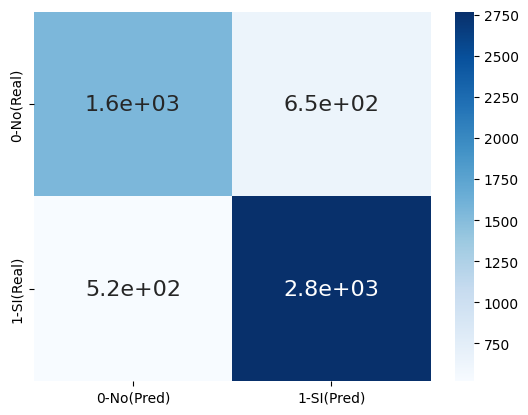

In [ ]:
#Mostrar el confusion matrix como grafico
sns.heatmap(confusion_matrix_RandomForest, annot=True,xticklabels=['0-No(Pred)','1-SI(Pred)'],
            yticklabels=['0-No(Real)','1-SI(Real)'], cmap = 'Blues',annot_kws={"size": 16});

In [ ]:
TN = confusion_matrix_RandomForest[0][0]
FP = confusion_matrix_RandomForest[0][1]
FN = confusion_matrix_RandomForest[1][0]
TP = confusion_matrix_RandomForest[1][1]
print( TN , FP, FN, TP)

1554 650 520 2768


In [ ]:
acc_RandomForest  = accuracy_score(y_test,y_pred_RandomForest)
f1_RandomForest   = f1_score(y_test,y_pred_RandomForest)
prec_RandomForest = precision_score(y_test, y_pred_RandomForest)
rec_RandomForest  = recall_score(y_test, y_pred_RandomForest)
auc_RandomForest  = roc_auc_score(y_test,y_pred_RandomForest_proba[:,1])

In [ ]:
results = pd.DataFrame([['Random Forest', acc_RandomForest,f1_RandomForest,prec_RandomForest,rec_RandomForest,auc_RandomForest]],
                       columns = ['Model','Accuracy','F1','Precision','Recall','AUC'])

In [ ]:
results

,Model,Accuracy,F1,Precision,Recall,AUC
0,Random Forest,0.787,0.826,0.810,0.842,0.856


VER LOS PARAMETROS

In [ ]:
#modelo_RandomForest.get_params()

In [ ]:
#Número de arboles generados
modelo_RandomForest.n_estimators

100

In [ ]:
#Numero de variables usadas
modelo_RandomForest.n_features_in_

13

In [ ]:
#Arbol en indice 5
estimator = modelo_RandomForest.estimators_[5]

In [ ]:
from sklearn import tree

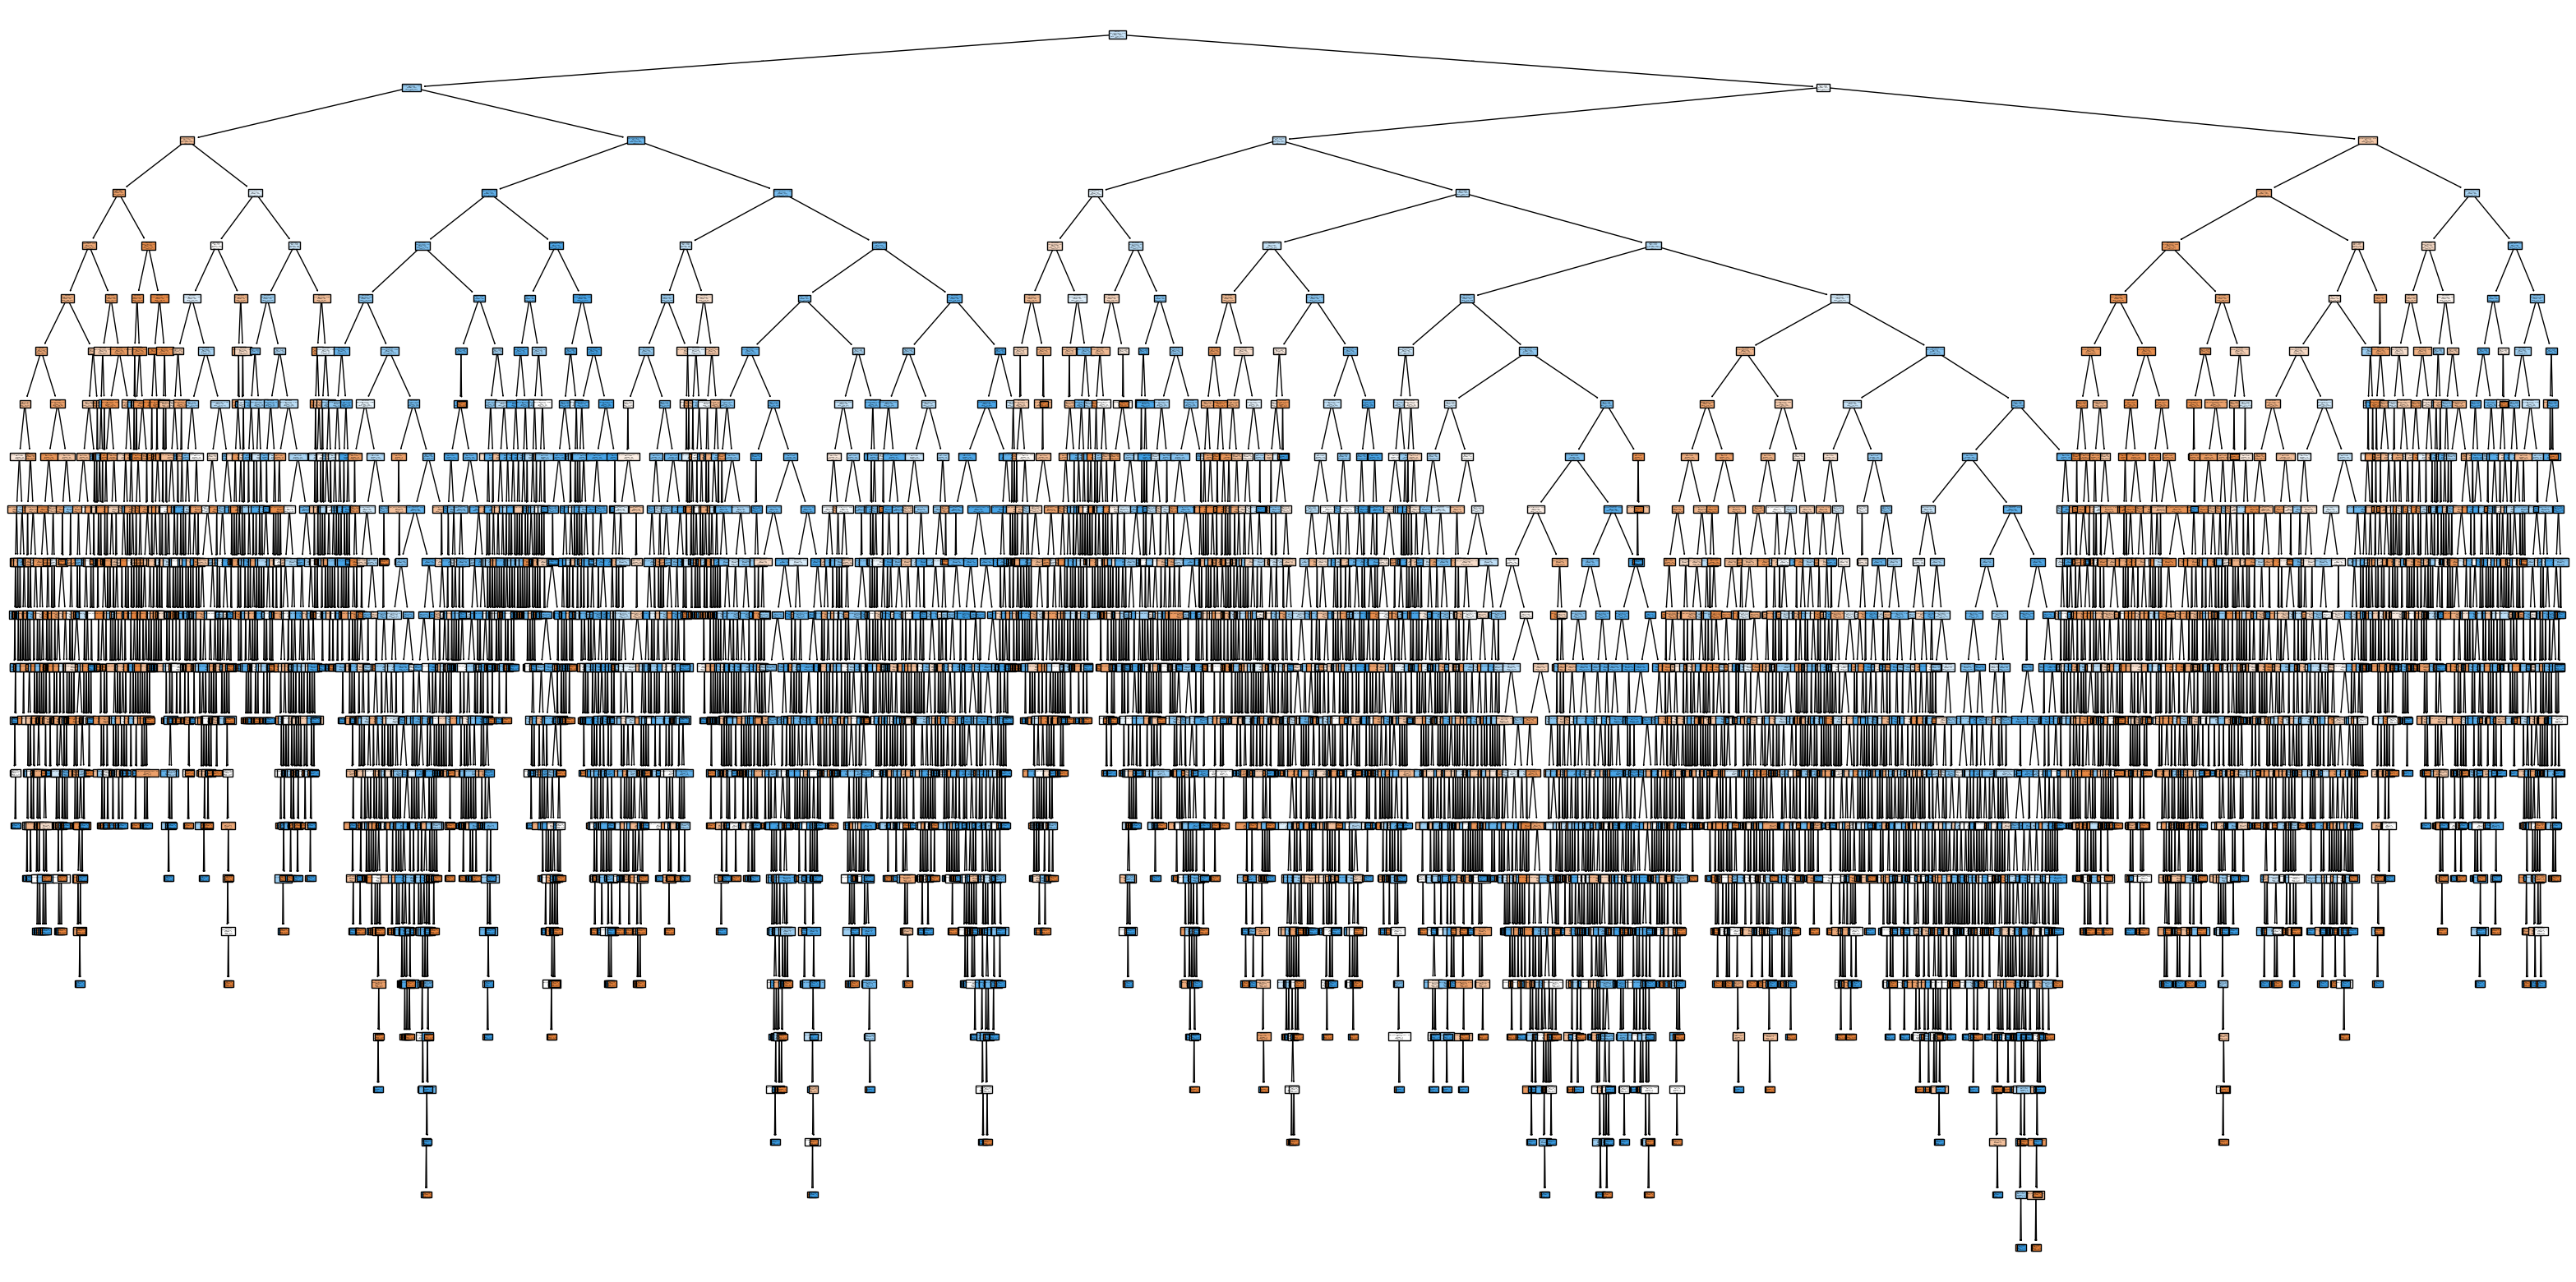

In [ ]:
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(estimator,
                   feature_names=X.columns,
                   class_names=['No','Si'],node_ids=True,
                   filled=True)
#fig.savefig("decistion_tree.png")

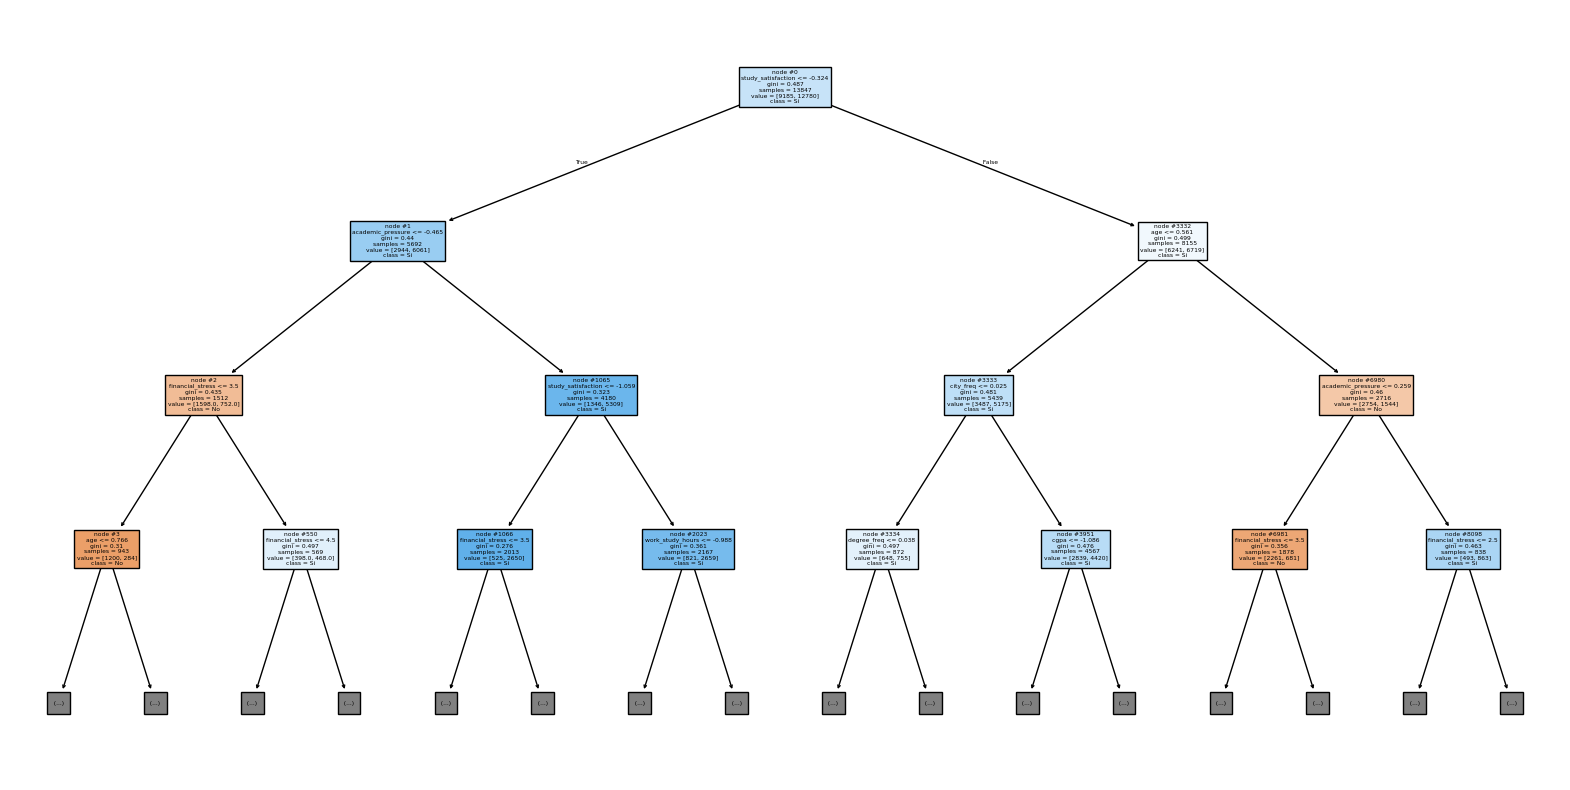

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(
    estimator,
    feature_names=X.columns,
    class_names=['No','Si'],
    filled=True,
    max_depth=3,
    node_ids=True
)
plt.show()


KNN

In [ ]:
#Importamos el modelo
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Instanciamos el modelo
#n_neighbors: n_neighbors determina cuántos de los puntos de datos más cercanos
#(vecinos más cercanos) deben ser consultados para decidir la etiqueta o el valor de salida de una nueva instancia.
#n_neighbors=1 (toma solo el vecino más cercano. Esto puede hacer que el modelo sea muy sensible al ruido en los datos y propenso a sobreajustarse (overfitting))
#n_neighbors=10,20 (más vecinos, Puede perder sensibilidad a patrones locales y generalizar en exceso).
modelo_knn = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
#Entrenamos el modelo
modelo_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
#Predecimos usando los datos de test
y_pred_knn       = modelo_knn.predict(X_test)
y_pred_knn_proba = modelo_knn.predict_proba(X_test)
#y_pred_knn_proba[:,1][:10]

In [ ]:
#Como apoyo podemos crear una tabla con los valores reales (y_test) vs las predicciones(y_pred)
df_comparar = pd.DataFrame()
df_comparar["y_test_knn"] = y_test
df_comparar["y_pred_knn"] = y_pred_knn
df_comparar["y_pred_proba_knn"] = y_pred_knn_proba[:,1][:]
df_comparar.head()

,y_test_knn,y_pred_knn,y_pred_proba_knn
13205,1,0,0.200
23294,1,0,0.400
7204,1,1,1.000
21905,1,0,0.200
3498,0,1,0.800


In [ ]:
#Importamos las métricas
from sklearn.metrics import roc_auc_score,confusion_matrix,f1_score,classification_report,\
                            accuracy_score,precision_score,recall_score

In [ ]:
confusion_matrix_knn = confusion_matrix(y_test,y_pred_knn)

In [ ]:
#Mostrar el confusion matrix como dataframe
pd.DataFrame(confusion_matrix_knn,columns = ['Prediccion NO','Prediccion SI'], index = ['Real NO','Real SI'])

,Prediccion NO,Prediccion SI
Real NO,1482,722
Real SI,607,2681


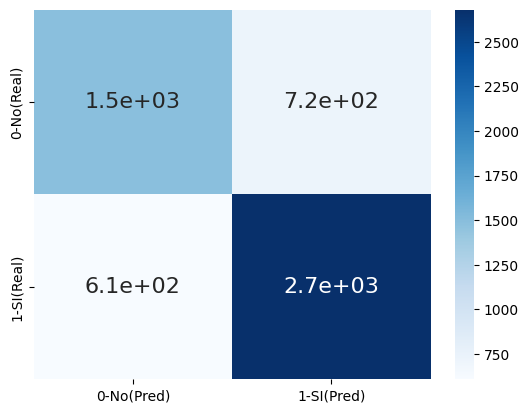

In [ ]:
import seaborn as sns

#Mostrar el confusion matrix como grafico
sns.heatmap(confusion_matrix_knn, annot=True,xticklabels=['0-No(Pred)','1-SI(Pred)'],
            yticklabels=['0-No(Real)','1-SI(Real)'], cmap = 'Blues',annot_kws={"size": 16});

In [ ]:
acc_knn  = accuracy_score(y_test,y_pred_knn)
f1_knn   = f1_score(y_test,y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
rec_knn  = recall_score(y_test, y_pred_knn)
auc_knn  = roc_auc_score(y_test,y_pred_knn_proba[:,1])

In [ ]:
results = pd.DataFrame([['knn', acc_knn,f1_knn,prec_knn,rec_knn,auc_knn]],
                       columns = ['Model','Accuracy','F1','Precision','Recall','AUC'])

In [ ]:
results

,Model,Accuracy,F1,Precision,Recall,AUC
0,knn,0.758,0.801,0.788,0.815,0.807


In [ ]:
#Número de K vecinos
modelo_knn.n_neighbors

5

ver los parametros

In [ ]:
X_test

,academic_pressure,study_satisfaction,work_study_hours,age,cgpa,gender,sleep_duration,dietary_habits,suicidal_thoughts,financial_stress,family_history_mental_illness,city_freq,degree_freq
13205,-0.103,0.778,1.306,1.689,0.027,1.000,1.000,1.000,1.000,5,0.000,0.040,0.055
23294,-0.103,-1.427,0.766,0.869,1.201,0.000,4.000,1.000,0.000,1,0.000,0.049,0.027
7204,0.621,1.512,0.227,-0.977,0.948,0.000,3.000,3.000,0.000,5,0.000,0.034,0.052
21905,-1.551,0.778,0.496,0.254,0.532,1.000,2.000,1.000,1.000,1,1.000,0.039,0.034
3498,-0.103,-0.692,-1.393,1.484,0.054,1.000,3.000,1.000,1.000,4,0.000,0.040,0.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8025,1.346,0.778,1.036,0.459,-0.813,0.000,2.000,2.000,0.000,1,1.000,0.022,0.221
19525,-0.103,-0.692,-0.313,0.048,0.061,1.000,4.000,1.000,0.000,3,1.000,0.040,0.043
26205,-0.103,-1.427,0.766,1.689,0.634,1.000,1.000,2.000,1.000,1,1.000,0.056,0.027
14644,-0.103,0.778,-0.853,-1.182,-1.018,1.000,2.000,1.000,1.000,5,0.000,0.025,0.221


In [ ]:
paciente1 = X_test.iloc[100]
paciente1

,12340
academic_pressure,0.621
study_satisfaction,-1.427
work_study_hours,-1.123
age,-0.977
cgpa,0.190
gender,1.000
sleep_duration,4.000
dietary_habits,1.000
suicidal_thoughts,1.000
financial_stress,5


In [ ]:
paciente1 = X_test.iloc[100].values.reshape(1,-1)
paciente1

array([[np.float64(0.6214655411974898), np.float64(-1.426534821642848),
        np.float64(-1.1229242629684357), np.float64(-0.9771795324594806),
        np.float64(0.19035771097970167), np.float64(1.0),
        np.float64(4.0), np.float64(1.0), np.float64(1.0), '5',
        np.float64(0.0), np.float64(0.02520304476089886),
        np.float64(0.029828459045052262)]], dtype=object)

In [ ]:
modelo_knn.kneighbors(paciente1, n_neighbors=3)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[0.41418019, 1.27199196, 1.33282486]]), array([[5066, 2497, 6211]]))

**Optimización**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
parametros_RL = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': [None, 'balanced']
}

In [ ]:
grid_RL = GridSearchCV(
    LogisticRegression(),
    parametros_RL,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

In [ ]:
grid_RL.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1')

In [ ]:
print("Mejores parámetros:")
print(grid_RL.best_params_)

Mejores parámetros:
{'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
modelo_RL_opt = grid_RL.best_estimator_

In [ ]:
y_pred_RL_opt = modelo_RL_opt.predict(X_test)
y_proba_RL_opt = modelo_RL_opt.predict_proba(X_test)[:,1]

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_RL_opt))
print("Precision:", precision_score(y_test, y_pred_RL_opt))
print("Recall:", recall_score(y_test, y_pred_RL_opt))
print("F1-score:", f1_score(y_test, y_pred_RL_opt))
print("AUC:", roc_auc_score(y_test, y_proba_RL_opt))

Accuracy: 0.793699927166788
Precision: 0.8124093940272543
Recall: 0.8521897810218978
F1-score: 0.831824254119044
AUC: 0.8659978980928285


In [ ]:
cm_rl_opt = confusion_matrix(y_test, y_pred_RL_opt)
print(cm_rl_opt)

[[1557  647]
 [ 486 2802]]


In [ ]:
print(classification_report(y_test, y_pred_RL_opt))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73      2204
           1       0.81      0.85      0.83      3288

    accuracy                           0.79      5492
   macro avg       0.79      0.78      0.78      5492
weighted avg       0.79      0.79      0.79      5492

